In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/pokemon/pokemon.csv")

In [3]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [4]:
df.shape

(801, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# Quitamos las resistencias de tipos por ahora

In [6]:
resistence = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 
'against_fairy', 'against_fight', 'against_fire', 'against_flying', 
'against_ghost', 'against_grass', 'against_ground', 'against_ice', 
'against_normal', 'against_poison', 'against_psychic', 'against_rock', 
'against_steel', 'against_water']

In [7]:
df_pk = df.drop(columns = resistence)

In [8]:
df_pk

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [9]:
df_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   attack             801 non-null    int64  
 2   base_egg_steps     801 non-null    int64  
 3   base_happiness     801 non-null    int64  
 4   base_total         801 non-null    int64  
 5   capture_rate       801 non-null    object 
 6   classfication      801 non-null    object 
 7   defense            801 non-null    int64  
 8   experience_growth  801 non-null    int64  
 9   height_m           781 non-null    float64
 10  hp                 801 non-null    int64  
 11  japanese_name      801 non-null    object 
 12  name               801 non-null    object 
 13  percentage_male    703 non-null    float64
 14  pokedex_number     801 non-null    int64  
 15  sp_attack          801 non-null    int64  
 16  sp_defense         801 non

In [10]:
df_pk = df_pk.reindex(columns=['pokedex_number', 'name','japanese_name', 'type1','type2','classfication',
                               'percentage_male','height_m', 'weight_kg', 'base_egg_steps', 'base_happiness',
                               'capture_rate', 'experience_growth', 'generation', 'is_legendary', 
                               'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','base_total', 'abilities'])

In [11]:
df_pk

,pokedex_number,name,japanese_name,type1,type2,classfication,percentage_male,height_m,weight_kg,base_egg_steps,...,generation,is_legendary,hp,attack,defense,sp_attack,sp_defense,speed,base_total,abilities
0,1,Bulbasaur,Fushigidaneフシギダネ,grass,poison,Seed Pokémon,88.1,0.7,6.9,5120,...,1,0,45,49,49,65,65,45,318,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,Fushigisouフシギソウ,grass,poison,Seed Pokémon,88.1,1.0,13.0,5120,...,1,0,60,62,63,80,80,60,405,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,Fushigibanaフシギバナ,grass,poison,Seed Pokémon,88.1,2.0,100.0,5120,...,1,0,80,100,123,122,120,80,625,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,Hitokageヒトカゲ,fire,NaN,Lizard Pokémon,88.1,0.6,8.5,5120,...,1,0,39,52,43,60,50,65,309,"['Blaze', 'Solar Power']"
4,5,Charmeleon,Lizardoリザード,fire,NaN,Flame Pokémon,88.1,1.1,19.0,5120,...,1,0,58,64,58,80,65,80,405,"['Blaze', 'Solar Power']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,Tekkaguyaテッカグヤ,steel,flying,Launch Pokémon,NaN,9.2,999.9,30720,...,7,1,97,101,103,107,101,61,570,['Beast Boost']
797,798,Kartana,Kamiturugiカミツルギ,grass,steel,Drawn Sword Pokémon,NaN,0.3,0.1,30720,...,7,1,59,181,131,59,31,109,570,['Beast Boost']
798,799,Guzzlord,Akuzikingアクジキング,dark,dragon,Junkivore Pokémon,NaN,5.5,888.0,30720,...,7,1,223,101,53,97,53,43,570,['Beast Boost']
799,800,Necrozma,Necrozmaネクロズマ,psychic,NaN,Prism Pokémon,NaN,2.4,230.0,30720,...,7,1,97,107,101,127,89,79,600,['Prism Armor']


# Eliminar nombre en japones y clasificación. Son irrelevantes

In [12]:
df_pk = df_pk.drop(columns = ['japanese_name', 'classfication'])

In [13]:
df_pk

,pokedex_number,name,type1,type2,percentage_male,height_m,weight_kg,base_egg_steps,base_happiness,capture_rate,...,generation,is_legendary,hp,attack,defense,sp_attack,sp_defense,speed,base_total,abilities
0,1,Bulbasaur,grass,poison,88.1,0.7,6.9,5120,70,45,...,1,0,45,49,49,65,65,45,318,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,grass,poison,88.1,1.0,13.0,5120,70,45,...,1,0,60,62,63,80,80,60,405,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,grass,poison,88.1,2.0,100.0,5120,70,45,...,1,0,80,100,123,122,120,80,625,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,fire,NaN,88.1,0.6,8.5,5120,70,45,...,1,0,39,52,43,60,50,65,309,"['Blaze', 'Solar Power']"
4,5,Charmeleon,fire,NaN,88.1,1.1,19.0,5120,70,45,...,1,0,58,64,58,80,65,80,405,"['Blaze', 'Solar Power']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,steel,flying,NaN,9.2,999.9,30720,0,25,...,7,1,97,101,103,107,101,61,570,['Beast Boost']
797,798,Kartana,grass,steel,NaN,0.3,0.1,30720,0,255,...,7,1,59,181,131,59,31,109,570,['Beast Boost']
798,799,Guzzlord,dark,dragon,NaN,5.5,888.0,30720,0,15,...,7,1,223,101,53,97,53,43,570,['Beast Boost']
799,800,Necrozma,psychic,NaN,NaN,2.4,230.0,30720,0,3,...,7,1,97,107,101,127,89,79,600,['Prism Armor']


# Miramos los nulos

In [14]:
def nulos(df):
  na_sum = df.isnull().sum()
  na_ratio = ((na_sum/len(df)) * 100)#.sort_values(ascending = False)
  col_type = df.dtypes
  nunique = df.nunique()
  nulls = pd.DataFrame(data = {'Num_nulos':na_sum, 'Ratio_nulos':na_ratio, 'Col_type':col_type, 'Nunique_values':nunique}) #.reset_index()
  return nulls

In [15]:
nulos(df_pk)

,Num_nulos,Ratio_nulos,Col_type,Nunique_values
pokedex_number,0,0.000000,int64,801
name,0,0.000000,object,801
type1,0,0.000000,object,18
type2,384,47.940075,object,18
percentage_male,98,12.234707,float64,7
height_m,20,2.496879,float64,51
weight_kg,20,2.496879,float64,421
base_egg_steps,0,0.000000,int64,10
base_happiness,0,0.000000,int64,6
capture_rate,0,0.000000,object,34


El segundo tipo se cambia por none ya que significa que no tiene tipo secundario
El porcentaje de macho se cambia a 0 porque significa que no puede ser macho

In [16]:
df_pk['type2'] = df_pk['type2'].fillna('None')
df_pk['percentage_male'] = df_pk['percentage_male'].fillna(0)

La altura y el peso no son tan importantes y eliminar las filas quitaria analisis en otras columnas. Se pone en 0 y no sería un cambio tan significante

In [17]:
df_pk['height_m'] = df_pk['height_m'].fillna(0)
df_pk['weight_kg'] = df_pk['weight_kg'].fillna(0)

In [18]:
nulos(df_pk)

,Num_nulos,Ratio_nulos,Col_type,Nunique_values
pokedex_number,0,0.0,int64,801
name,0,0.0,object,801
type1,0,0.0,object,18
type2,0,0.0,object,19
percentage_male,0,0.0,float64,7
height_m,0,0.0,float64,52
weight_kg,0,0.0,float64,422
base_egg_steps,0,0.0,int64,10
base_happiness,0,0.0,int64,6
capture_rate,0,0.0,object,34


# Analisiss varios

## Peso

In [19]:
df_pk.groupby('generation')['weight_kg'].sum()

generation
1    6095.1
2    4910.5
3    9055.5
4    8226.7
5    8174.8
6    3708.0
7    7765.7
Name: weight_kg, dtype: float64

In [20]:
df_pk.groupby('type1')['weight_kg'].sum().sort_values(ascending=False)

type1
water       5822.2
normal      4662.0
steel       4532.2
ground      4051.2
rock        3810.8
fire        3304.8
psychic     2981.1
dragon      2892.4
grass       2560.7
bug         2382.0
ice         2375.0
dark        2003.8
ghost       1878.4
fighting    1642.9
electric    1441.9
poison      1014.9
fairy        424.0
flying       156.0
Name: weight_kg, dtype: float64

In [21]:
df_pk.groupby('type2')['weight_kg'].sum().sort_values(ascending=False)

type2
None        20252.2
flying       4829.2
dragon       4001.1
ground       3015.1
psychic      2246.1
steel        2236.1
fighting     2136.5
ice          1475.7
rock         1473.7
dark         1140.0
water         877.2
ghost         845.2
poison        831.3
grass         707.1
fire          624.9
fairy         483.3
electric      460.9
bug           178.7
normal        122.0
Name: weight_kg, dtype: float64

## Altura

In [22]:
df_pk.groupby('generation')['height_m'].sum()

generation
1    165.1
2    116.3
3    166.0
4    121.3
5    161.0
6     77.6
7    101.7
Name: height_m, dtype: float64

In [23]:
df_pk.groupby('type1')['height_m'].sum().sort_values(ascending=False)

type1
water       146.3
normal      103.5
grass        72.3
bug          63.6
fire         58.4
psychic      55.3
rock         53.5
dragon       52.3
steel        45.0
dark         37.6
electric     37.3
ground       36.2
poison       34.8
ghost        33.8
fighting     33.5
ice          27.8
fairy        14.3
flying        3.5
Name: height_m, dtype: float64

In [24]:
df_pk.groupby('type2')['height_m'].sum().sort_values(ascending=False)

type2
None        401.7
flying      128.0
ground       52.1
dragon       40.6
fighting     35.4
poison       31.7
psychic      31.0
steel        24.5
dark         21.6
fairy        21.6
grass        21.1
ice          19.6
ghost        19.0
water        15.6
rock         15.3
fire         13.3
electric      8.2
bug           5.1
normal        3.6
Name: height_m, dtype: float64

## Tipos

### Tipo primario

/tmp/ipykernel_32/4068267528.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_tipos_por_generacion.pivot('generation', 'type1', 'Count').plot(kind='bar', ax=ax)


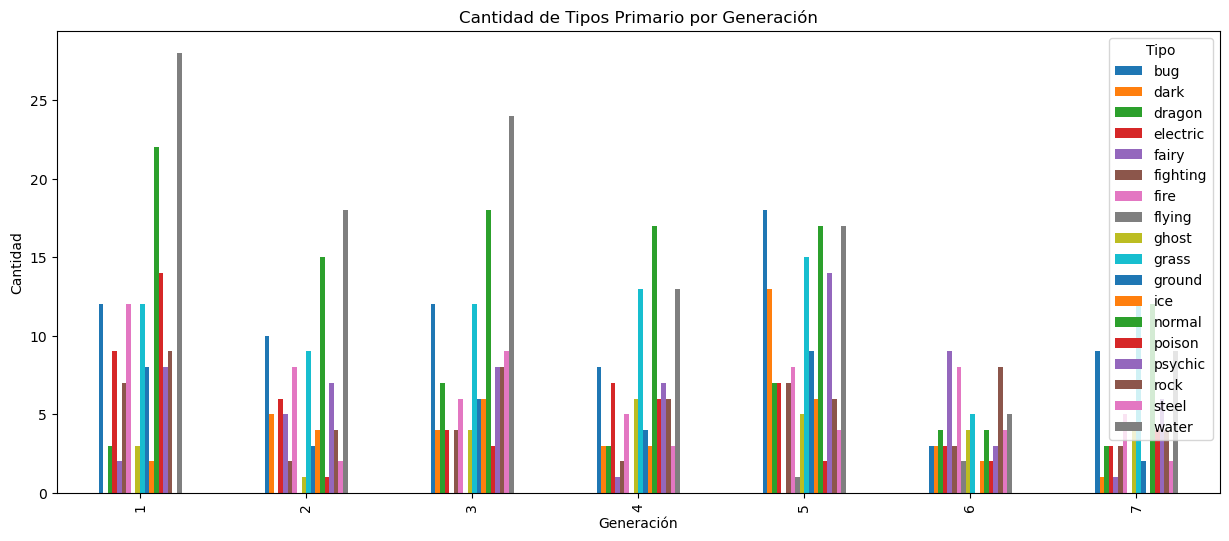

In [25]:
suma_tipos_por_generacion = df_pk.groupby('generation')['type1'].value_counts()

df_tipos_por_generacion = suma_tipos_por_generacion.to_frame(name='Count').reset_index()

plt.figure(figsize=(15, 6))
ax = plt.gca()
df_tipos_por_generacion.pivot('generation', 'type1', 'Count').plot(kind='bar', ax=ax)
plt.xlabel('Generación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos Primario por Generación')
plt.legend(title='Tipo')
plt.show()

### Tipo puro por gen

In [26]:
puro = df_pk['type2'] != 'None'
df_puro = df_pk.drop(df_pk[puro].index)

In [27]:
df_puro

,pokedex_number,name,type1,type2,percentage_male,height_m,weight_kg,base_egg_steps,base_happiness,capture_rate,...,generation,is_legendary,hp,attack,defense,sp_attack,sp_defense,speed,base_total,abilities
3,4,Charmander,fire,None,88.1,0.6,8.5,5120,70,45,...,1,0,39,52,43,60,50,65,309,"['Blaze', 'Solar Power']"
4,5,Charmeleon,fire,None,88.1,1.1,19.0,5120,70,45,...,1,0,58,64,58,80,65,80,405,"['Blaze', 'Solar Power']"
6,7,Squirtle,water,None,88.1,0.5,9.0,5120,70,45,...,1,0,44,48,65,50,64,43,314,"['Torrent', 'Rain Dish']"
7,8,Wartortle,water,None,88.1,1.0,22.5,5120,70,45,...,1,0,59,63,80,65,80,58,405,"['Torrent', 'Rain Dish']"
8,9,Blastoise,water,None,88.1,1.6,85.5,5120,70,45,...,1,0,79,103,120,135,115,78,630,"['Torrent', 'Rain Dish']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,782,Jangmo-o,dragon,None,50.0,0.6,29.7,10240,70,45,...,7,0,45,55,65,45,45,45,300,"['Bulletproof', 'Soundproof', 'Overcoat']"
788,789,Cosmog,psychic,None,0.0,0.2,0.1,30720,0,45,...,7,1,43,29,31,29,31,37,200,['Unaware']
789,790,Cosmoem,psychic,None,0.0,0.1,999.9,30720,0,45,...,7,1,43,29,131,29,131,37,400,['Sturdy']
795,796,Xurkitree,electric,None,0.0,3.8,100.0,30720,0,30,...,7,1,83,89,71,173,71,83,570,['Beast Boost']


/tmp/ipykernel_32/2216399820.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_tipos_por_generacion.pivot('generation', 'type1', 'Count').plot(kind='bar', ax=ax)


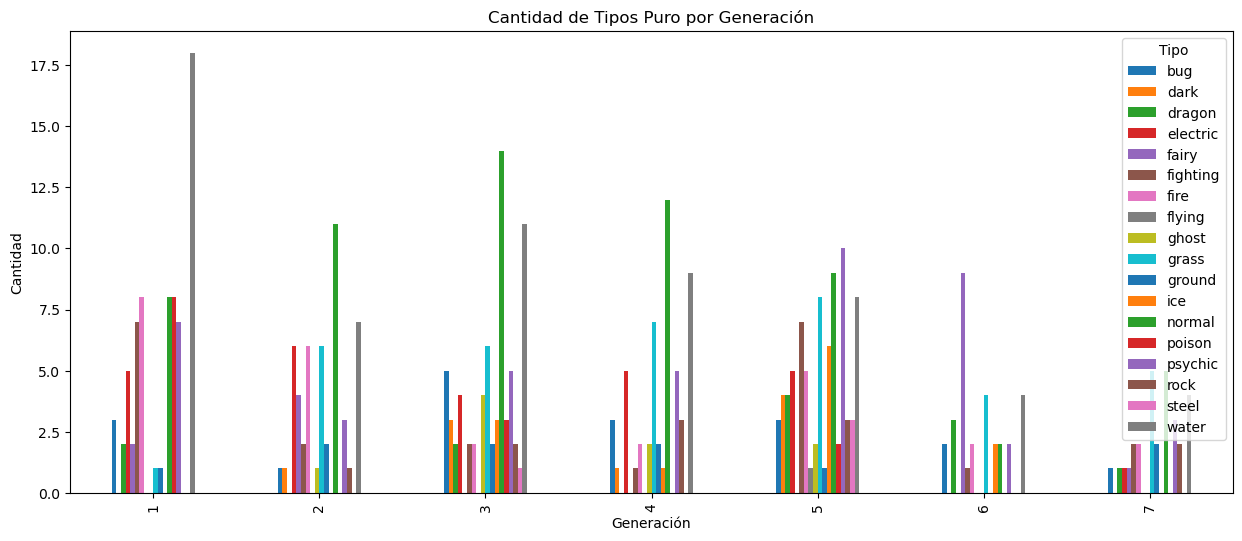

In [28]:
suma_tipos_por_generacion = df_puro.groupby('generation')['type1'].value_counts()

df_tipos_por_generacion = suma_tipos_por_generacion.to_frame(name='Count').reset_index()

plt.figure(figsize=(15, 6))
ax = plt.gca()
df_tipos_por_generacion.pivot('generation', 'type1', 'Count').plot(kind='bar', ax=ax)
plt.xlabel('Generación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos Puro por Generación')
plt.legend(title='Tipo')
plt.show()

### Tipo secundario

/tmp/ipykernel_32/4091476426.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_tipos_por_generacion.pivot('generation', 'type2', 'Count').plot(kind='bar', ax=ax)


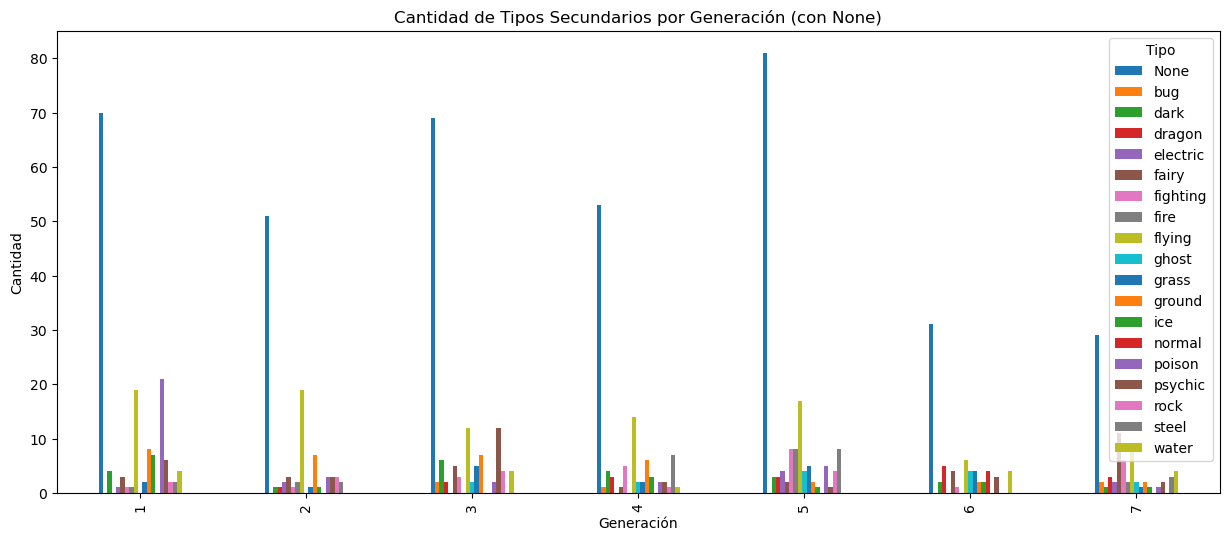

In [29]:
suma_tipos_por_generacion = df_pk.groupby('generation')['type2'].value_counts()

df_tipos_por_generacion = suma_tipos_por_generacion.to_frame(name='Count').reset_index()

plt.figure(figsize=(15, 6))
ax = plt.gca()
df_tipos_por_generacion.pivot('generation', 'type2', 'Count').plot(kind='bar', ax=ax)
plt.xlabel('Generación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos Secundarios por Generación (con None)')
plt.legend(title='Tipo')
plt.show()

El tipo puro es bastante más contundente asi que se quitan para ver mejor los tipos secundarios

/tmp/ipykernel_32/2425833415.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_tipos_por_generacion.pivot('generation', 'type2', 'Count').plot(kind='bar', ax=ax)


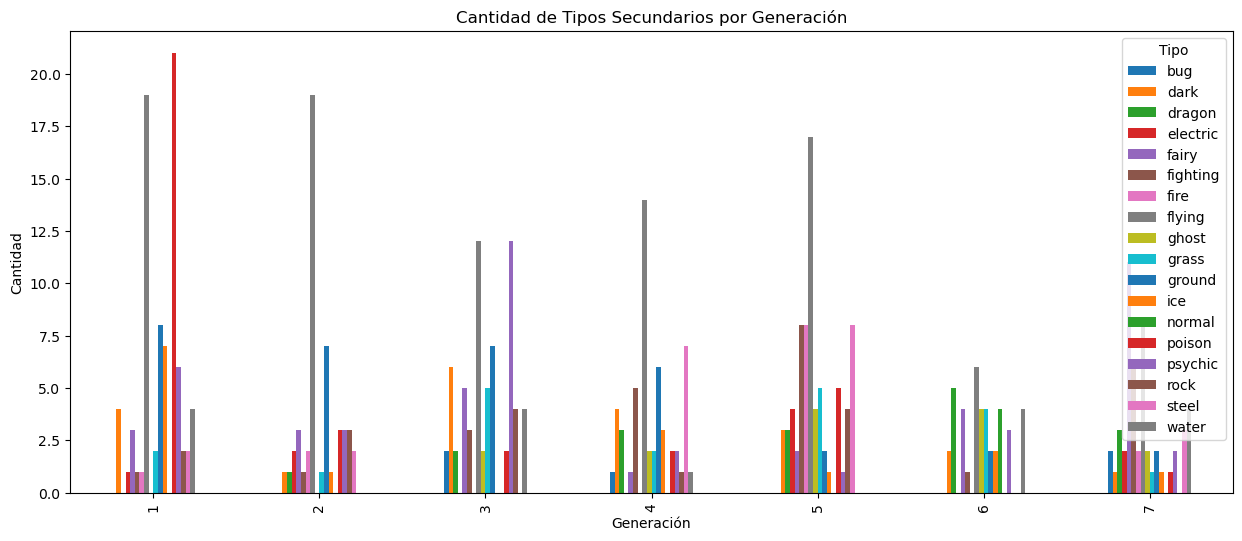

In [30]:
secun = df_pk['type2'] == 'None'
df_secun = df_pk.drop(df_pk[secun].index)

suma_tipos_por_generacion = df_secun.groupby('generation')['type2'].value_counts()

df_tipos_por_generacion = suma_tipos_por_generacion.to_frame(name='Count').reset_index()

plt.figure(figsize=(15, 6))
ax = plt.gca()
df_tipos_por_generacion.pivot('generation', 'type2', 'Count').plot(kind='bar', ax=ax)
plt.xlabel('Generación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos Secundarios por Generación')
plt.legend(title='Tipo')
plt.show()